In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [3]:
spx_price = pd.read_csv('data/SPX-Price-Daily.csv')

In [4]:
spx_gamma = pd.read_csv('data/spx-gamma-dix.csv')

In [7]:
spx_price
spx_price.rename(columns={'pricing_date':'date'}, inplace=True)

In [6]:
spx_gamma.head()

,date,price,dix,gex
0,2011-05-02,1361.219971,0.378842,1.897313e+09
1,2011-05-03,1356.619995,0.383411,1.859731e+09
2,2011-05-04,1347.319946,0.392122,1.717764e+09
3,2011-05-05,1335.099976,0.405457,1.361864e+09
4,2011-05-06,1340.199951,0.418649,1.490329e+09


In [165]:
def z_score(x, window):
    return (x.rolling(window).mean() - x )/ x.rolling(window).std()

In [171]:
combined['norm_gex'] = z_score(combined['gex'], 40)

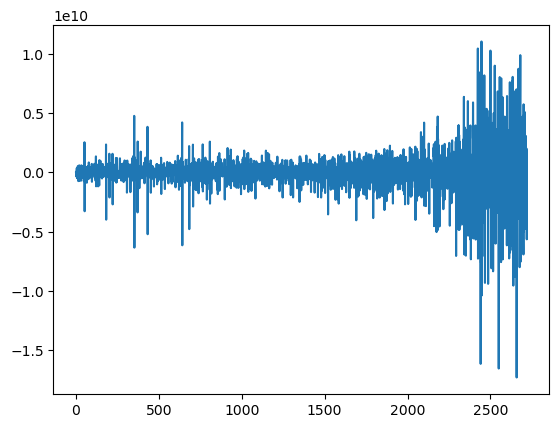

In [188]:
combined['gex'].diff().plot()
plt.show()

In [10]:
combined = pd.merge(spx_gamma,spx_price,on='date',how='inner')

In [76]:
combined['liquidity'] = np.log(combined['volume']/abs((combined['open']-combined['close'])))

In [47]:
def log_mod(x):
    return np.log(abs(x))

In [70]:
combined['gex_scaled'] = pd.Series(combined['gex']/1e9).apply(lambda x: log_mod(x))

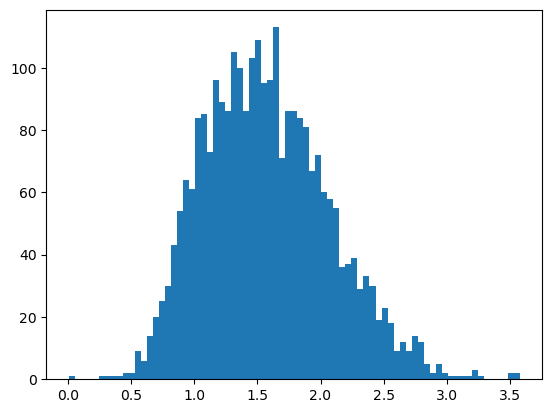

In [114]:
plt.hist(combined['volume'].apply(lambda x: log_mod(x/1e6) - 3), bins = 75);
plt.show()

In [134]:
x = []
for i in range(len(combined)):
    if combined.iloc[i]['high'] == combined.iloc[i]['low']:
        x.append((log_mod(combined.iloc[i]['volume']/1e6)- 3)/abs(combined.iloc[i]['high'] - combined.iloc[i]['vwap']))
    else:
        x.append((log_mod(combined.iloc[i]['volume']/1e6)- 3)/abs(combined.iloc[i]['high'] - combined.iloc[i]['low']))

combined['liquidity'] = pd.Series(x) 

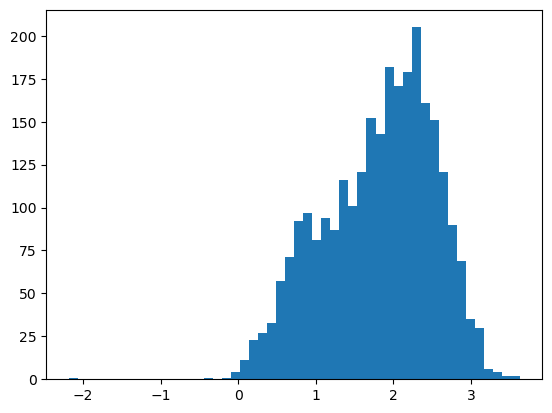

In [135]:
plt.hist(np.log(combined['liquidity'])+2, bins = 50);
plt.show()

In [125]:
combined['log_liquidity'] = np.log(combined['liquidity']) + 2

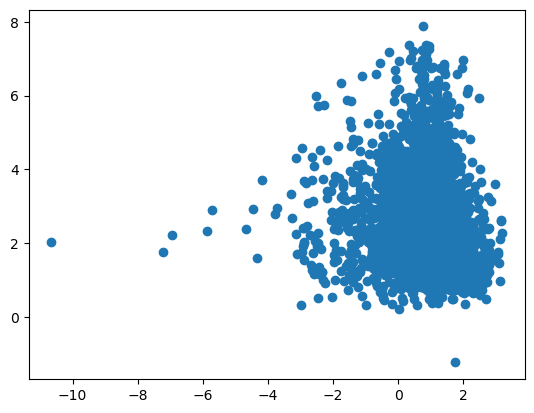

In [136]:
plt.scatter(combined['gex_scaled'],combined['log_liquidity'])
plt.show()

In [173]:
combined['date'] = pd.to_datetime(combined['date'])
pre_covid = combined[combined['date'] < '2020-03-01']
post_covid = combined[combined['date'] > '2020-03-01']

C:\Users\faiza\anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


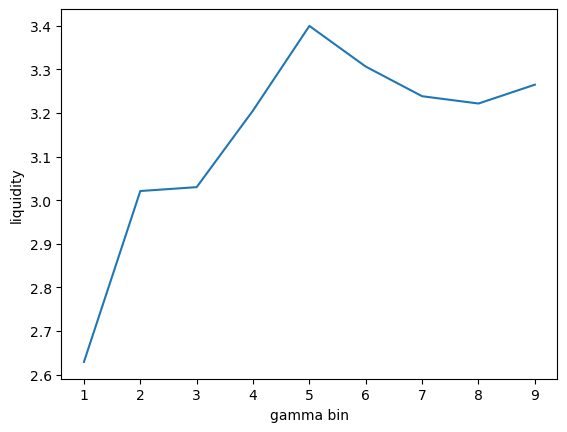

In [189]:
plt.plot(pre_covid.groupby(pd.qcut(pre_covid['gex'],10)).mean()[['log_liquidity']].shift(1))
plt.xlabel("gamma bin")
plt.ylabel("liquidity")
plt.show()

C:\Users\faiza\anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


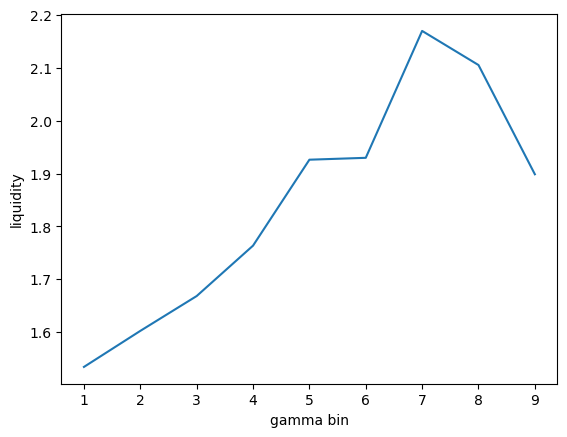

In [191]:
plt.plot(post_covid.groupby(pd.qcut(post_covid['gex'],10)).mean()[['log_liquidity']].shift(1))
plt.xlabel("gamma bin")
plt.ylabel("liquidity")
plt.show()

C:\Users\faiza\anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


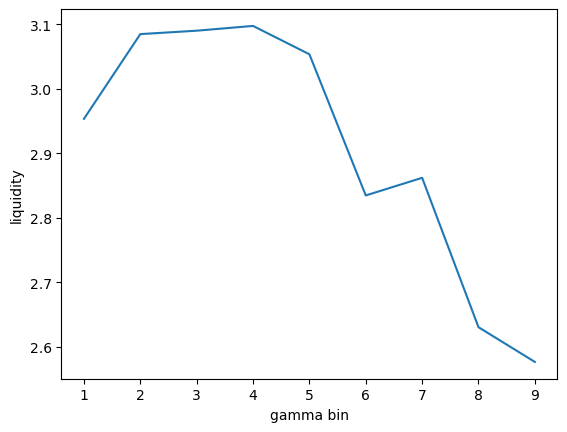

In [177]:
plt.plot(combined.groupby(pd.qcut(combined['norm_gex'],10)).mean()[['log_liquidity']].shift(1))
plt.xlabel("gamma bin")
plt.ylabel("liquidity")
plt.show()

In [140]:
combined['cut'] = pd.qcut(combined['gex_scaled'], 10)#combined.groupby(pd.qcut(combined['gex_scaled'],10)).mean()

In [146]:
combined[combined['cut'] == combined['cut'].unique()[-1]]

,date,price,dix,gex,Unnamed: 0,trading_item_id,open,high,low,mid,...,ask,volume,adjustment_factor,split_adjustment_factor,dividend_adjustment,vwap,liquidity,log_liquidity,gex_scaled,cut
352,2012-09-21,1460.150024,0.397217,8.992652e+09,352,6179710,122.895070,122.920212,122.199469,122.262324,...,122.266515,108737426.0,NaN,1.0,0.838073,122.501175,2.343326,2.962113,2.196408,"(1.679, 3.187]"
432,2013-01-18,1485.979980,0.420186,6.626066e+09,432,6179710,124.889086,125.327974,124.433317,125.197152,...,125.201372,169905915.0,NaN,1.0,0.844016,124.703402,2.386662,3.949816,1.891011,"(1.679, 3.187]"
641,2013-11-15,1798.180054,0.422410,8.992653e+09,641,6179710,153.776807,154.256396,153.579833,154.200729,...,154.205011,102818190.0,NaN,1.0,0.856409,153.999473,2.413614,3.358753,2.196408,"(1.679, 3.187]"
683,2014-01-17,1838.699951,0.426788,6.659403e+09,683,6179710,158.521096,158.822467,157.849469,158.094871,...,158.099177,107848616.0,NaN,1.0,0.861060,158.529707,1.727372,3.434537,1.896030,"(1.679, 3.187]"
789,2014-06-20,1962.869995,0.393901,5.533297e+09,789,6179710,170.350293,170.414513,170.063523,170.285118,...,170.289463,100587108.0,NaN,1.0,0.869001,170.080903,4.589949,5.025227,1.710784,"(1.679, 3.187]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,2022-01-12,4726.350098,0.449847,7.387201e+09,2694,6179710,471.590000,473.200000,468.940000,471.070000,...,471.080000,67415800.0,NaN,1.0,1.000000,470.990000,0.284244,2.753466,1.999749,"(1.679, 3.187]"
2696,2022-01-14,4662.850098,0.424451,8.103152e+09,2696,6179710,461.190000,465.090000,459.900000,464.675000,...,464.680000,95821120.0,NaN,1.0,1.000000,462.940000,0.301056,1.184978,2.092253,"(1.679, 3.187]"
2699,2022-01-20,4482.729980,0.435431,-7.496823e+09,2699,6179710,453.750000,458.740000,444.500000,446.795000,...,446.800000,121757600.0,NaN,1.0,1.000000,452.390000,0.126547,0.643005,2.014479,"(1.679, 3.187]"
2708,2022-02-02,4589.379883,0.483121,7.730074e+09,2708,6179710,455.500000,458.120000,453.050000,457.305000,...,457.310000,116893700.0,NaN,1.0,1.000000,455.650000,0.347390,1.950847,2.045118,"(1.679, 3.187]"


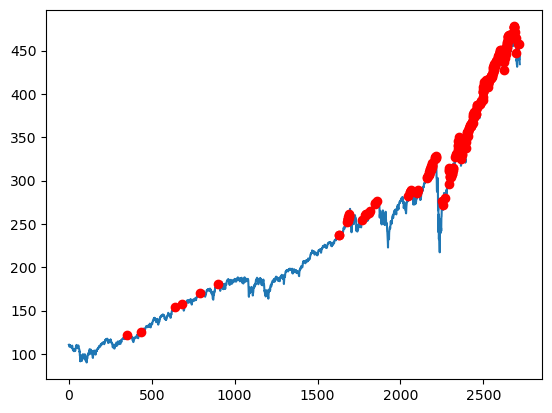

In [152]:
plt.plot(combined['close']);
for i in range(len(combined)):
    if combined.iloc[i]['cut'] == combined['cut'].unique()[-1]:
        plt.plot(combined.index[i], combined.iloc[i]['close'], 'ro')
plt.show()